In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
clusteringData = pd.read_csv("../ClusteringData/ClusteringDF.csv")
missingValues = clusteringData.isnull().sum()
missingValues

file_name                         0
std_dev                           0
mean_time_diff                    0
median_time_diff                  0
max_peak                          0
median_peak                       0
std_peak                          0
avg_peaks_per_second              0
sum_peak_magnitude                0
percent_time_above_threshold      0
mean_post_peak_magnitude        170
std_dev_post_peak_magnitude     170
dtype: int64

In [22]:
clusteringData.drop(['file_name', 'mean_post_peak_magnitude', 'std_dev_post_peak_magnitude'], axis = 1, inplace= True)

clusteringData.isnull().sum()

std_dev                         0
mean_time_diff                  0
median_time_diff                0
max_peak                        0
median_peak                     0
std_peak                        0
avg_peaks_per_second            0
sum_peak_magnitude              0
percent_time_above_threshold    0
dtype: int64

In [23]:
clusteringData.dtypes

std_dev                         float64
mean_time_diff                  float64
median_time_diff                float64
max_peak                        float64
median_peak                     float64
std_peak                        float64
avg_peaks_per_second            float64
sum_peak_magnitude              float64
percent_time_above_threshold    float64
dtype: object

In [24]:
# Standardize
scaler = StandardScaler()
scaledData = scaler.fit_transform(clusteringData)

In [25]:
# Apply PCA
pca = PCA(n_components=6)  # Reduce to 2 components for 2D visualization
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])

In [32]:
dbscan = DBSCAN(eps = 1, min_samples = 5)
clusters = dbscan.fit_predict(pcaData)
pcaDF['Cluster'] = clusters
clusteringData['Cluster'] = clusters

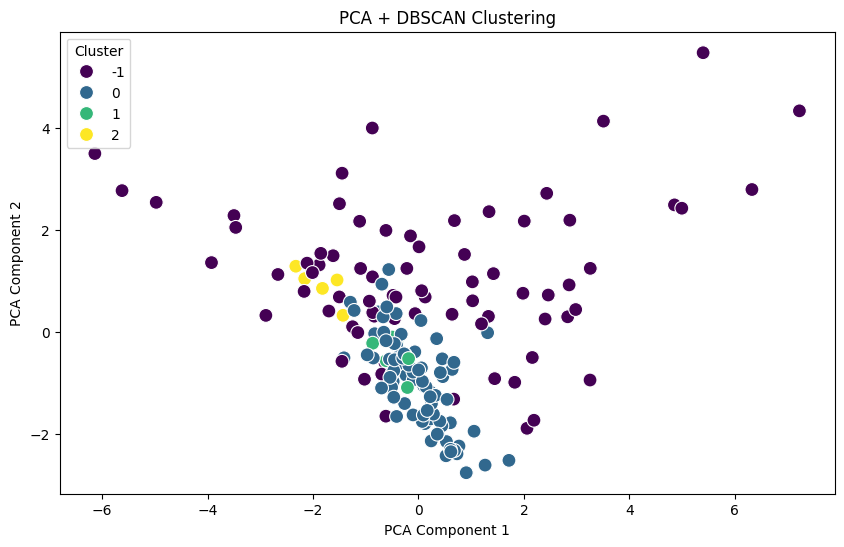

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = pcaDF, x = "PCA1", y = "PCA2", hue = "Cluster",
                palette = "viridis", s = 100)
plt.title("PCA + DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [10]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2'])

In [11]:
# Apply DBSCAN
# change eps and min_samples to see how the clusters change
dbscan = DBSCAN(eps = 0.3, min_samples = 5)
clusters = dbscan.fit_predict(pcaData)
pcaDF['Cluster'] = clusters
clusteringData['Cluster'] = clusters

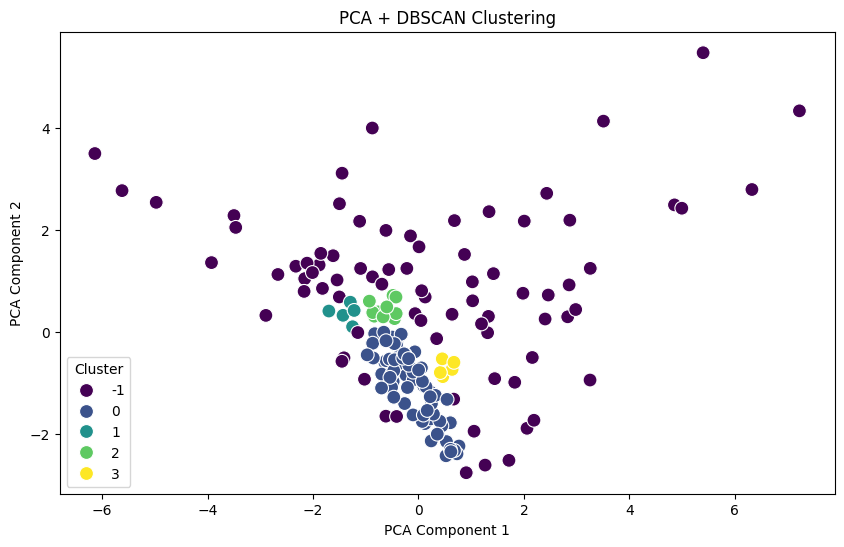

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = pcaDF, x = "PCA1", y = "PCA2", hue = "Cluster",
                palette = "viridis", s = 100)
plt.title("PCA + DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

valid_clusters = pcaDF[pcaDF['Cluster'] != -1]
silhouette = silhouette_score(valid_clusters[['PCA1', 'PCA2']], valid_clusters['Cluster'])
print(f"Silhouette Score: {silhouette:.3f}")

davies_bouldin = davies_bouldin_score(valid_clusters[['PCA1', 'PCA2']], valid_clusters['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

n_noise = sum(pcaDF['Cluster'] == -1)
n_clusters = len(set(pcaDF['Cluster'])) - (1 if -1 in pcaDF['Cluster'] else 0)
print(f"Clusters Found: {n_clusters}")
print(f"Noise Points: {n_noise}")
print(f"Percentage of Noise: {n_noise / len(pcaDF) * 100:.2f}%")

Silhouette Score: 0.112
Davies-Bouldin Index: 0.893
Clusters Found: 5
Noise Points: 79
Percentage of Noise: 46.47%


In [14]:
filtered_data = clusteringData[clusteringData['Cluster'] != -1].copy()
noise_data = clusteringData[clusteringData['Cluster'] == -1]

summary_stats = filtered_data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
summary_stats

std_dev                               mean_time_diff            \
             mean       std       min       max           mean       std   
Cluster                                                                    
0        0.023998  0.026035  0.000395  0.115298       0.209400  0.137441   
1        0.060487  0.029588  0.025735  0.107734       0.175232  0.082927   
2        0.017086  0.028167  0.000848  0.077376       0.442070  0.141064   
3        0.087775  0.104874  0.007067  0.223996       0.722751  0.226390   

                            median_time_diff            ...  \
              min       max             mean       std  ...   
Cluster                                                 ...   
0        0.045152  0.617381         0.209828  0.140814  ...   
1        0.075163  0.302147         0.181500  0.098197  ...   
2        0.226377  0.595744         0.445080  0.140797  ...   
3        0.429590  1.063278         0.726960  0.225760  ...   

        avg_peaks_per_second            sum_peak_magnitude             \
                         min        max               mean        std   
Cluster                                                                 
0                   0.485527  15.002483          10.154071  10.177137   
1                   2.555613  10.073929          17.920118  11.008078   
2                   2.378322  14.984767          13.302671  10.270235   
3                   4.743338   8.426417           3.578376   1.836711   

                             percent_time_above_threshold                     \
              min        max                         mean       std      min   
Cluster                                                                        
0        0.787064  52.417804                     0.003039  0.001251  0.00093   
1        7.233200  32.328571                     0.005896  0.002038  0.00339   
2        3.339691  30.470712                     0.002564  0.000850  0.00138   
3        2.188148   6.770359                     0.001242  0.000229  0.00091   

                   
              max  
Cluster            
0        0.006060  
1        0.008340  
2        0.003363  
3        0.001480  

[4 rows x 36 columns]

In [15]:
noise_summary = noise_data.describe()
noise_summary

,std_dev,mean_time_diff,median_time_diff,max_peak,median_peak,std_peak,avg_peaks_per_second,sum_peak_magnitude,percent_time_above_threshold,Cluster
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0
mean,0.578676,1.524111,1.488644,0.299936,0.215517,0.039087,6.765038,11.036767,0.003653,-1.0
std,0.777034,2.106464,2.187753,0.121417,0.077530,0.028085,3.724517,16.574035,0.005467,0.0
min,0.001356,0.044417,0.042850,0.103325,0.102102,0.000481,0.285662,0.309059,0.000023,-1.0
25%,0.036593,0.179267,0.161125,0.199567,0.153773,0.015886,4.647101,1.085500,0.000222,-1.0
50%,0.207105,0.867109,0.727500,0.292645,0.203619,0.036287,5.131590,3.079672,0.000945,-1.0
75%,0.810902,1.951428,1.730425,0.378196,0.256720,0.053358,9.866504,12.893904,0.006637,-1.0
max,3.207606,11.698750,11.698750,0.660171,0.403958,0.132408,16.054150,99.845517,0.024110,-1.0


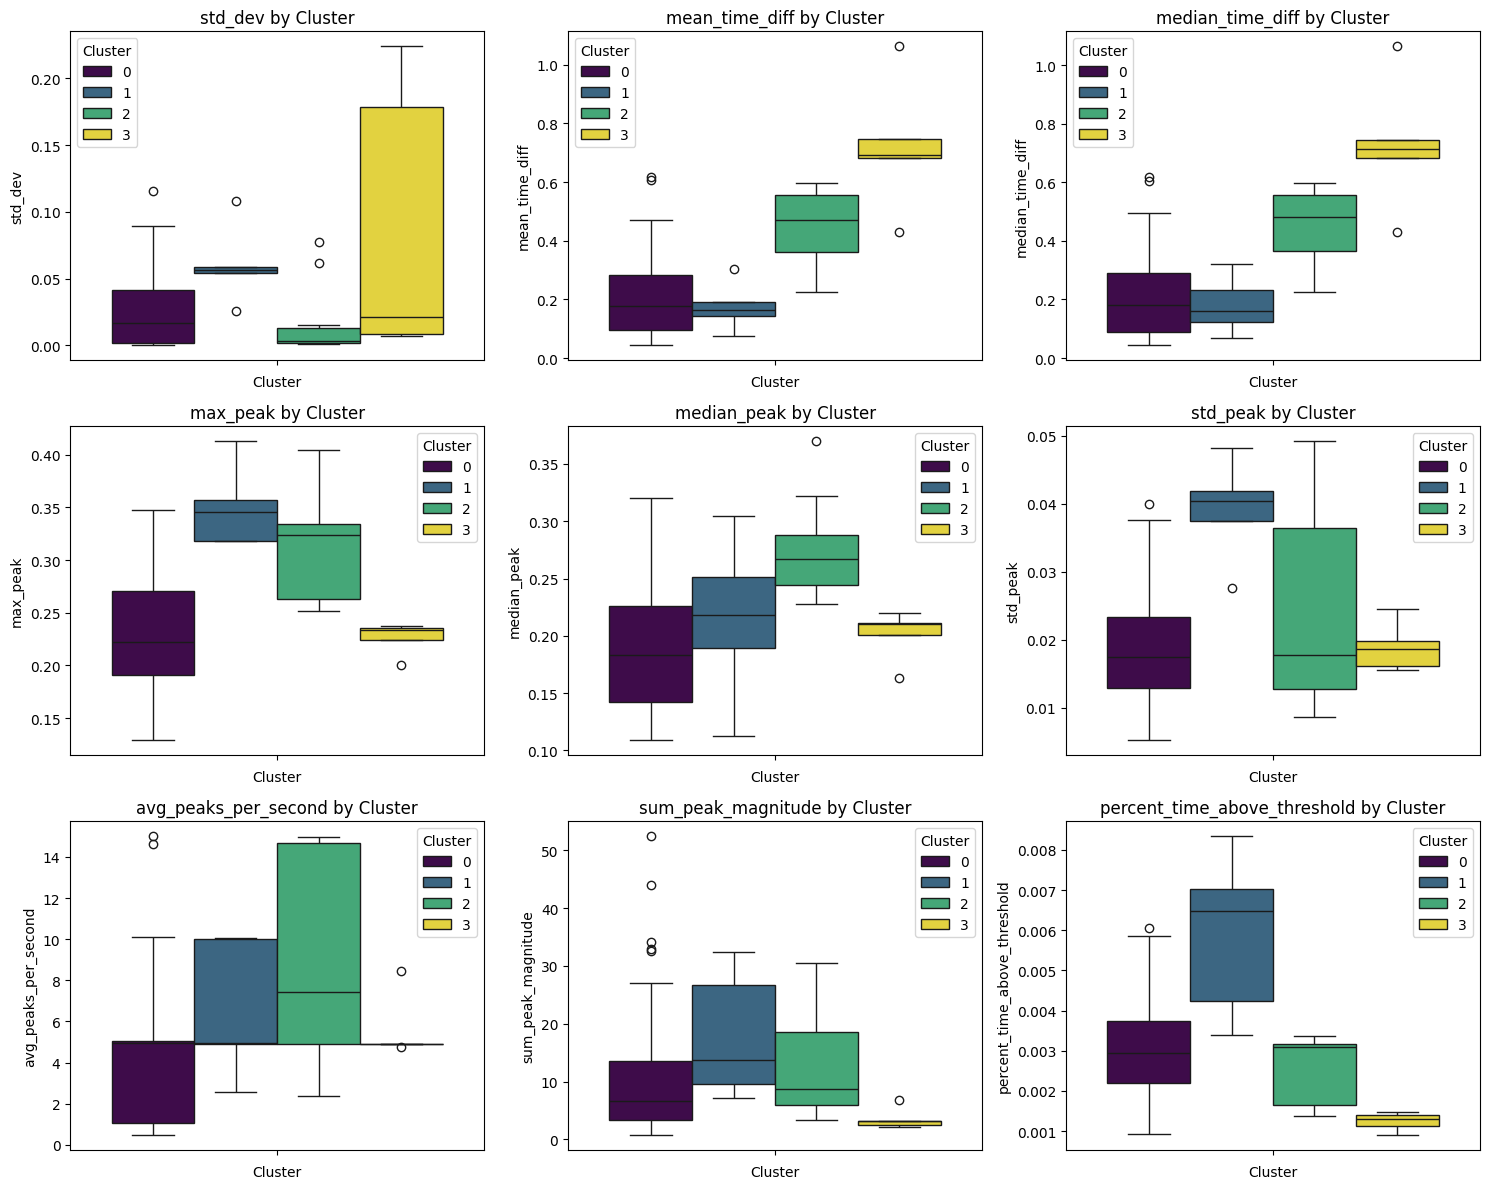

In [16]:
feature_cols = [col for col in filtered_data.columns if col != 'Cluster']

nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

for i, feature in enumerate(feature_cols):
    row = i // ncols
    col = i % ncols

    sns.boxplot(
        data=filtered_data,
        hue='Cluster',
        y=feature,
        ax=axes[row][col],
        palette='viridis'
    )
    axes[row][col].set_title(f"{feature} by Cluster")
    axes[row][col].set_xlabel("Cluster")

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import f_oneway, kruskal
feature_cols = [col for col in filtered_data.columns if col != 'Cluster']

results = []
for feature in feature_cols:
    groups = [
        filtered_data[filtered_data['Cluster'] == cluster][feature].dropna()
        for cluster in sorted(filtered_data['Cluster'].unique())
    ]

    # ANOVA
    stat, p_value = f_oneway(*groups)  # if you assume normality
    results.append({
        'Feature': feature,
        'Test': 'ANOVA',
        'F': stat,
        'p-value': p_value
    })

pd.DataFrame(results).sort_values(by='p-value')

,Feature,Test,F,p-value
1,mean_time_diff,ANOVA,27.090739,1.819957e-12
2,median_time_diff,ANOVA,26.320969,3.296173e-12
3,max_peak,ANOVA,14.272972,1.210735e-07
8,percent_time_above_threshold,ANOVA,12.928081,4.632764e-07
5,std_peak,ANOVA,10.244317,7.620907e-06
4,median_peak,ANOVA,9.079392,2.711612e-05
0,std_dev,ANOVA,7.221251,2.203288e-04
6,avg_peaks_per_second,ANOVA,5.798027,1.163064e-03
7,sum_peak_magnitude,ANOVA,2.005502,1.191054e-01


/Users/krishnanshugupta/Cal Poly/Acoustic-Space-Boiling/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                        Feature  Importance
8  percent_time_above_threshold    0.167495
1                mean_time_diff    0.165629
0                       std_dev    0.155511
3                      max_peak    0.129496
5                      std_peak    0.108068
2              median_time_diff    0.102992
6          avg_peaks_per_second    0.068938
7            sum_peak_magnitude    0.053318
4                   median_peak    0.048553


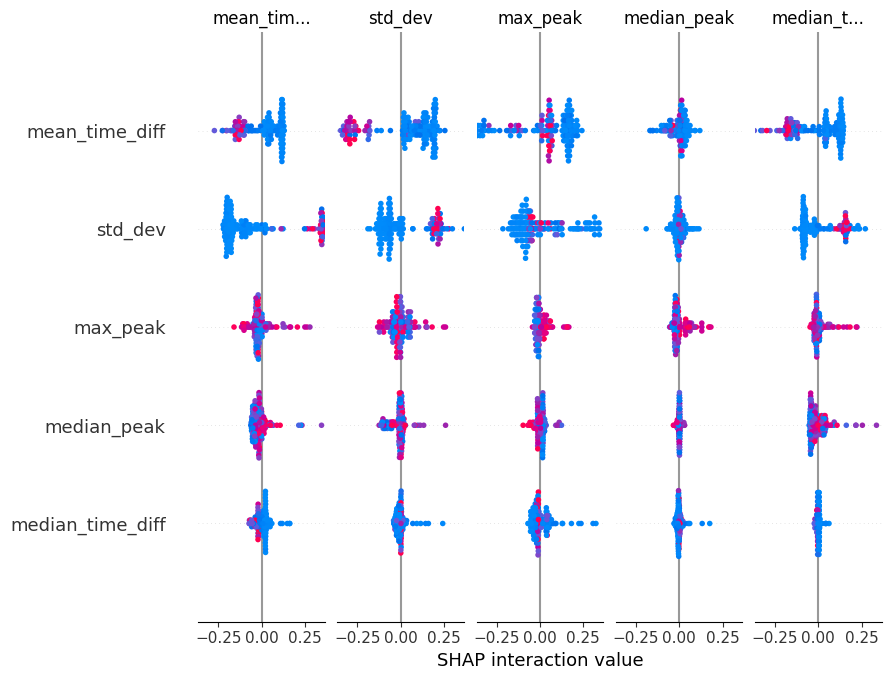

In [18]:
from sklearn.ensemble import RandomForestClassifier
import shap

X = clusteringData.drop(columns=['Cluster'])
y = clusteringData['Cluster']

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Check feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# 1. Prepare data
#    clusteringData should contain all your features + a "Cluster" column from DBSCAN
X = clusteringData.drop(columns=['Cluster'])  # all features
y = clusteringData['Cluster']                 # multi-class targets (0, 1, 2, ..., or -1 for noise)

# 2. Fit Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# 3. Create SHAP explainer for the trained Random Forest
explainer = shap.TreeExplainer(rf)

# 4. Compute SHAP values
#    In a multi-class setting, shap_values is typically a list or array
#    of shape (n_classes, n_samples, n_features)
shap_values = explainer.shap_values(X)

# 5. Plot per-cluster (class) SHAP importance
#    Sort your unique cluster labels so the order is consistent
unique_clusters = sorted(y.unique())

for i, cluster_label in enumerate(unique_clusters):
    print(f"SHAP Summary for Cluster {cluster_label}")

    # shap_values[i] are the SHAP values for class i
    shap.summary_plot(
        shap_values[i],  # SHAP values for this specific cluster
        X,
        plot_type="bar",
        show=False  # so we can modify the plot before displaying
    )
    plt.title(f"SHAP Summary for Cluster {cluster_label}")
    plt.show()

SHAP Summary for Cluster -1


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

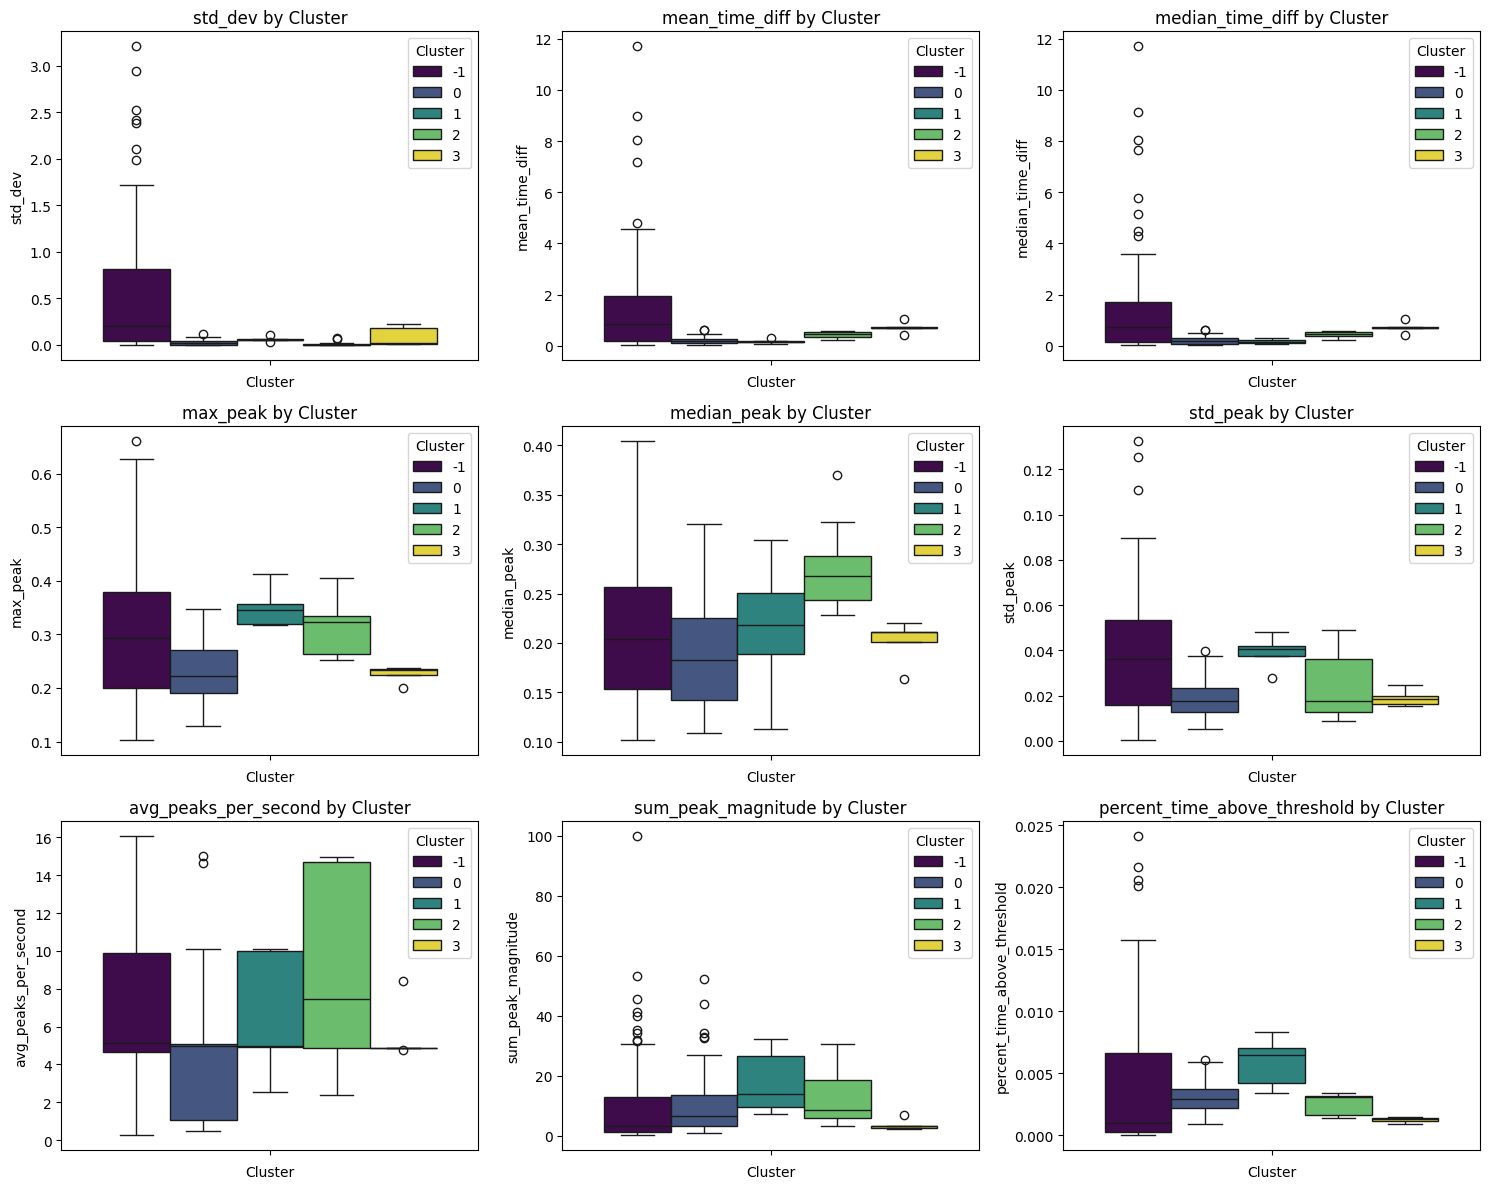

In [52]:
feature_cols = [col for col in clusteringData.columns if col != 'Cluster']

nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

for i, feature in enumerate(feature_cols):
    row = i // ncols
    col = i % ncols

    sns.boxplot(
        data=clusteringData,
        hue='Cluster',
        y=feature,
        ax=axes[row][col],
        palette='viridis'
    )
    axes[row][col].set_title(f"{feature} by Cluster")
    axes[row][col].set_xlabel("Cluster")

plt.tight_layout()
plt.show()

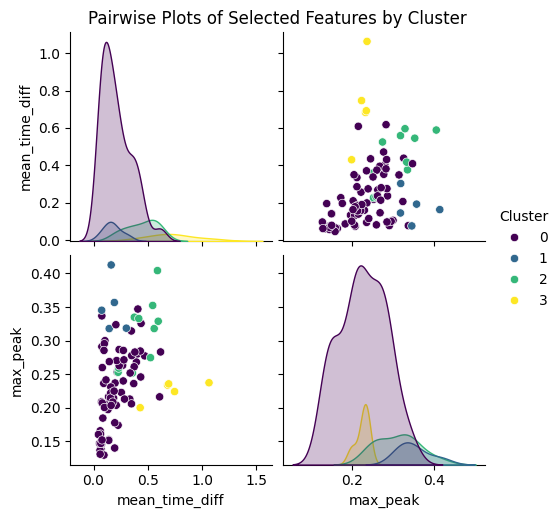

In [31]:
features_to_plot = ['mean_time_diff', 'max_peak']  # plus others if you want
sns.pairplot(filtered_data, vars=features_to_plot, hue='Cluster', palette='viridis')
plt.suptitle("Pairwise Plots of Selected Features by Cluster", y=1.02)
plt.show()

In [10]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=5)
clusters = hdb.fit_predict(scaledData)
pcaDF['Cluster'] = clusters

/Users/krishnanshugupta/Cal Poly/Acoustic-Space-Boiling/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/krishnanshugupta/Cal Poly/Acoustic-Space-Boiling/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


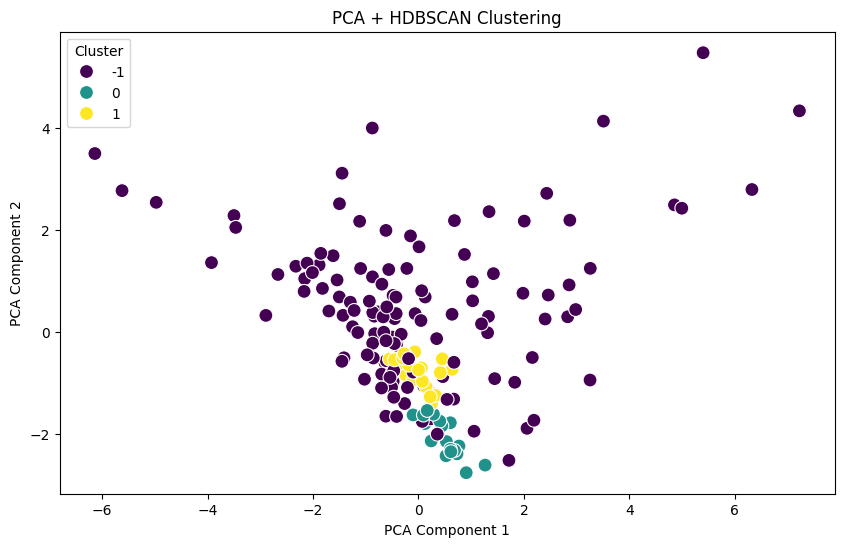

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = pcaDF, x = "PCA1", y = "PCA2", hue = "Cluster",
                palette = "viridis", s = 100)
plt.title("PCA + HDBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

valid_clusters = pcaDF[pcaDF['Cluster'] != -1]
silhouette = silhouette_score(valid_clusters[['PCA1', 'PCA2']], valid_clusters['Cluster'])
print(f"Silhouette Score: {silhouette:.3f}")

davies_bouldin = davies_bouldin_score(valid_clusters[['PCA1', 'PCA2']], valid_clusters['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

n_noise = sum(pcaDF['Cluster'] == -1)
n_clusters = len(set(pcaDF['Cluster'])) - (1 if -1 in pcaDF['Cluster'] else 0)
print(f"Clusters Found: {n_clusters}")
print(f"Noise Points: {n_noise}")
print(f"Percentage of Noise: {n_noise / len(pcaDF) * 100:.2f}%")

Silhouette Score: 0.565
Davies-Bouldin Index: 0.585
Clusters Found: 3
Noise Points: 128
Percentage of Noise: 75.29%


Clusters Found: 4
Noise Points: 152
Percentage of Noise: 89.41%


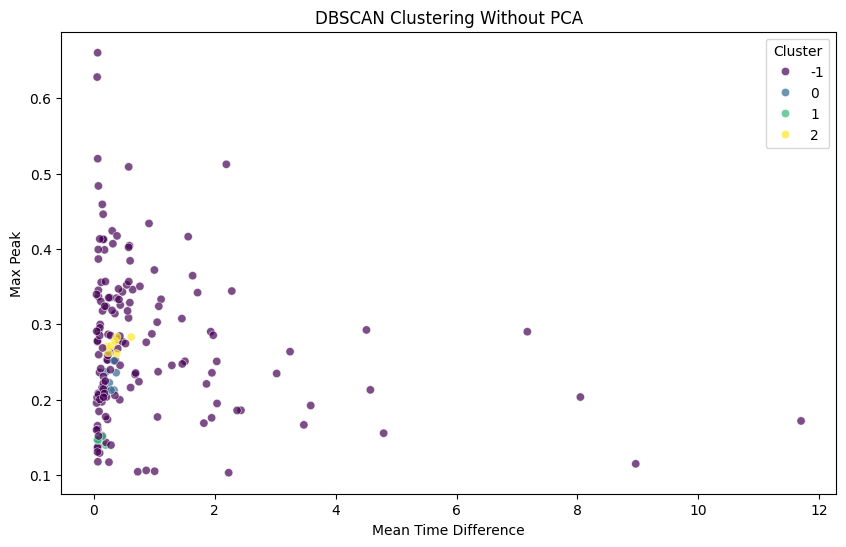

In [13]:
# apply dbscan without pca
# Apply DBSCAN without PCA
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(scaledData)

# Add cluster labels to dataframe
clusteringData['Cluster'] = clusters

# Count noise points
n_noise = sum(clusteringData['Cluster'] == -1)
n_clusters = len(set(clusteringData['Cluster'])) - (1 if -1 in clusteringData['Cluster'] else 0)

print(f"Clusters Found: {n_clusters}")
print(f"Noise Points: {n_noise}")
print(f"Percentage of Noise: {n_noise / len(clusteringData) * 100:.2f}%")

# Visualize clusters using two selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clusteringData, x="mean_time_diff", y="max_peak", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("DBSCAN Clustering Without PCA")
plt.xlabel("Mean Time Difference")
plt.ylabel("Max Peak")
plt.legend(title="Cluster")
plt.show()

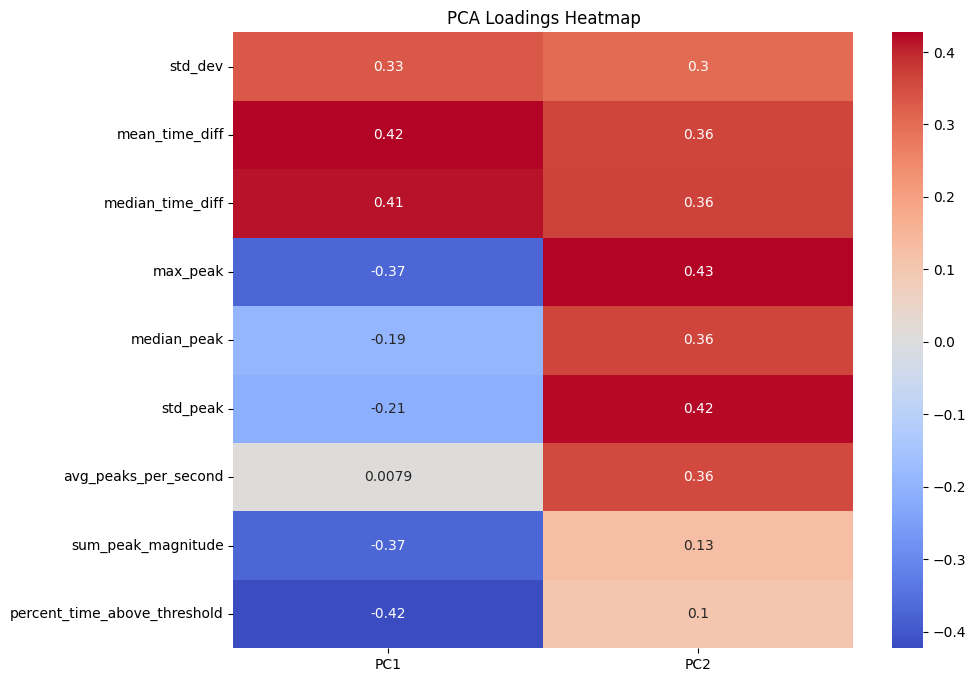

In [59]:
# Visualizing PCA Components
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title("PCA Loadings Heatmap")
plt.show()
